In [7]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import tree    

In [ ]:

'''classification for Max Price Category VS Weather O(n**3) 20-fold 12-Depths'''


In [6]:

# read csv file
dataset = pd.read_csv('combined_detail_cleaned.csv')

# Selecting features
features = dataset[['temperature_min','rainfall', 
                    'evaporation', 'sunshine', 'max_wind_speed']]

classlabel = dataset['max_price_category']


In [8]:

# K-fold Method (cross validation) with Classification Accuracy Formula
k, x_times = 20, 12
kf = KFold(n_splits = k, shuffle = True, random_state = 88)
classification_accuracy = []

# Implementation of K-fold Method
for train_index, test_index in kf.split(features):
    
    # Split Training and Test sets
    features_train, feature_test = features.iloc[train_index, :], features.iloc[test_index, :]
    class_train, class_test = classlabel[train_index], classlabel[test_index]
    
    # Scaling the features
    scalar = preprocessing.StandardScaler().fit(features_train)
    features_train = scalar.transform(features_train)
    feature_test = scalar.transform(feature_test)

    # Step 1: Instantiate 
    dt = DecisionTreeClassifier(
        criterion='entropy', random_state=88, max_depth = x_times)
    
    # Step 2: Fit
    dt.fit(features_train, class_train)
    
    # Step 3: Predict
    predictions = dt.predict(feature_test)
    
    # Step 4: Evaluate
    my_score=accuracy_score(class_test, predictions)
    classification_accuracy.append(my_score)
print(f'The AVG {k}-Fold Accuracy Score with Max depth of {x_times} is {sum(classification_accuracy)/k}')

The AVG 20-Fold Accuracy Score with Max depth of 12 is 0.5012820512820513


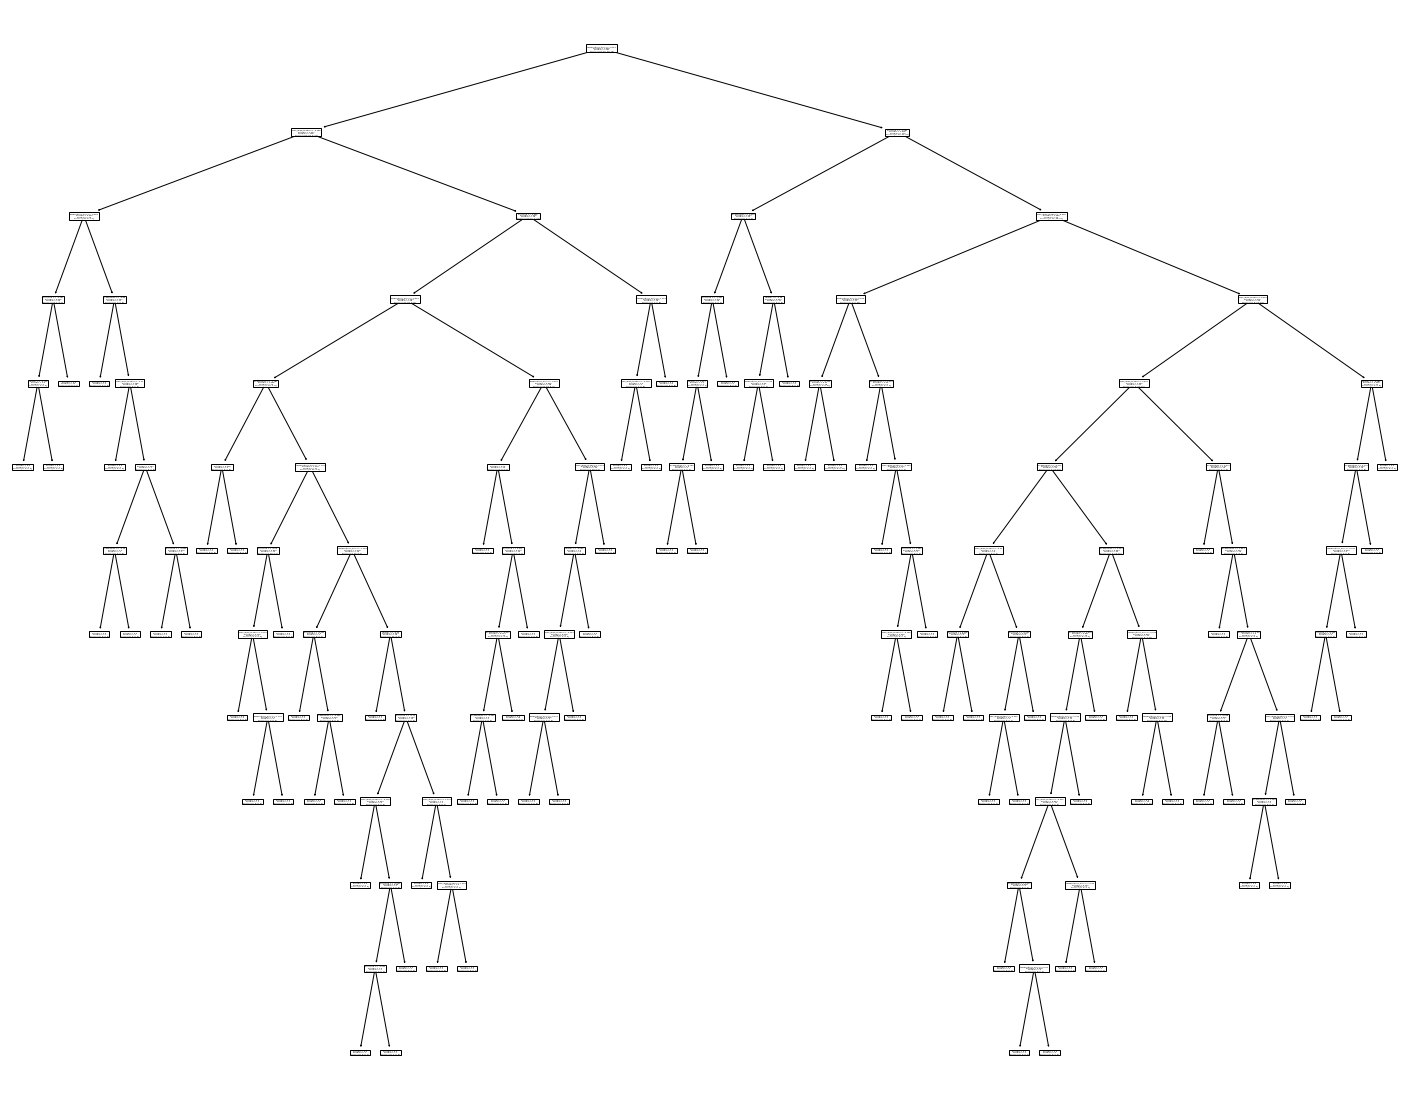

In [9]:
plt.figure(figsize=(25, 20))
featurenames = ['temperature_min','rainfall', 
                'evaporation', 'sunshine', 'max_wind_speed']
tree.plot_tree(dt, feature_names=featurenames)
plt.show()